In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print("Train Data Shape: ", df_train.shape)
print("Test Data Shape: ", df_test.shape)

Train Data Shape:  (7613, 5)
Test Data Shape:  (3263, 4)


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


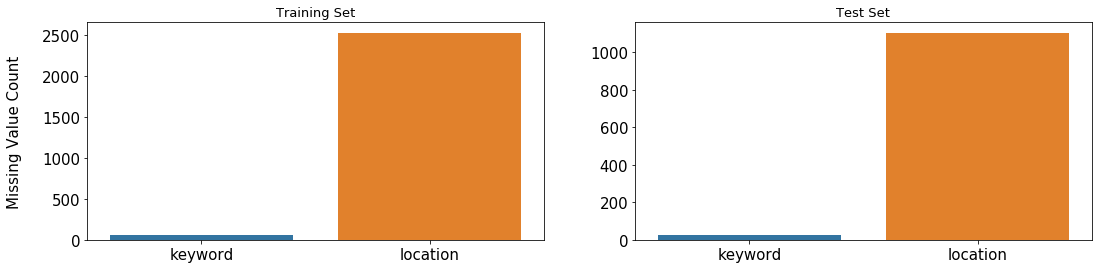

In [4]:
null_columns = ["keyword", "location"]

fig, axes = plt.subplots(ncols = 2, figsize = (18,4))

sns.barplot(x = df_train[null_columns].isnull().sum().index, y = df_train[null_columns].isnull().sum().values, ax = axes[0])
sns.barplot(x = df_test[null_columns].isnull().sum().index, y = df_test[null_columns].isnull().sum().values, ax = axes[1])

axes[0].set_ylabel("Missing Value Count", size = 15, labelpad = 20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)
plt.show()

for df in [df_train, df_test]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')

In [5]:
df_train.sample(5)

,id,keyword,location,text,target
6531,9342,survived,London,Survived another tube strike with the last per...,0
1366,1969,burning%20buildings,Charlotte County Florida,Where are the protests ? The riots? The burnin...,1
4196,5959,hazard,"Pleasanton, CA",Choking Hazard Prompts Recall Of Kraft Cheese ...,0
7568,10818,wrecked,no_location,The Riddler would be the best early-exit prima...,0
5089,7256,nuclear%20disaster,"Hammersmith, London",@DalaiLama then have the biggest nuclear disas...,1


In [6]:
print(f'Number of unique values in Keyword = {df_train["keyword"].nunique()} in Train and {df_test["keyword"].nunique()} in Test')

print(f'Number of unique values in Location = {df_train["location"].nunique()} in Train and {df_test["location"].nunique()} in Test')

Number of unique values in Keyword = 222 in Train and 222 in Test
Number of unique values in Location = 3342 in Train and 1603 in Test


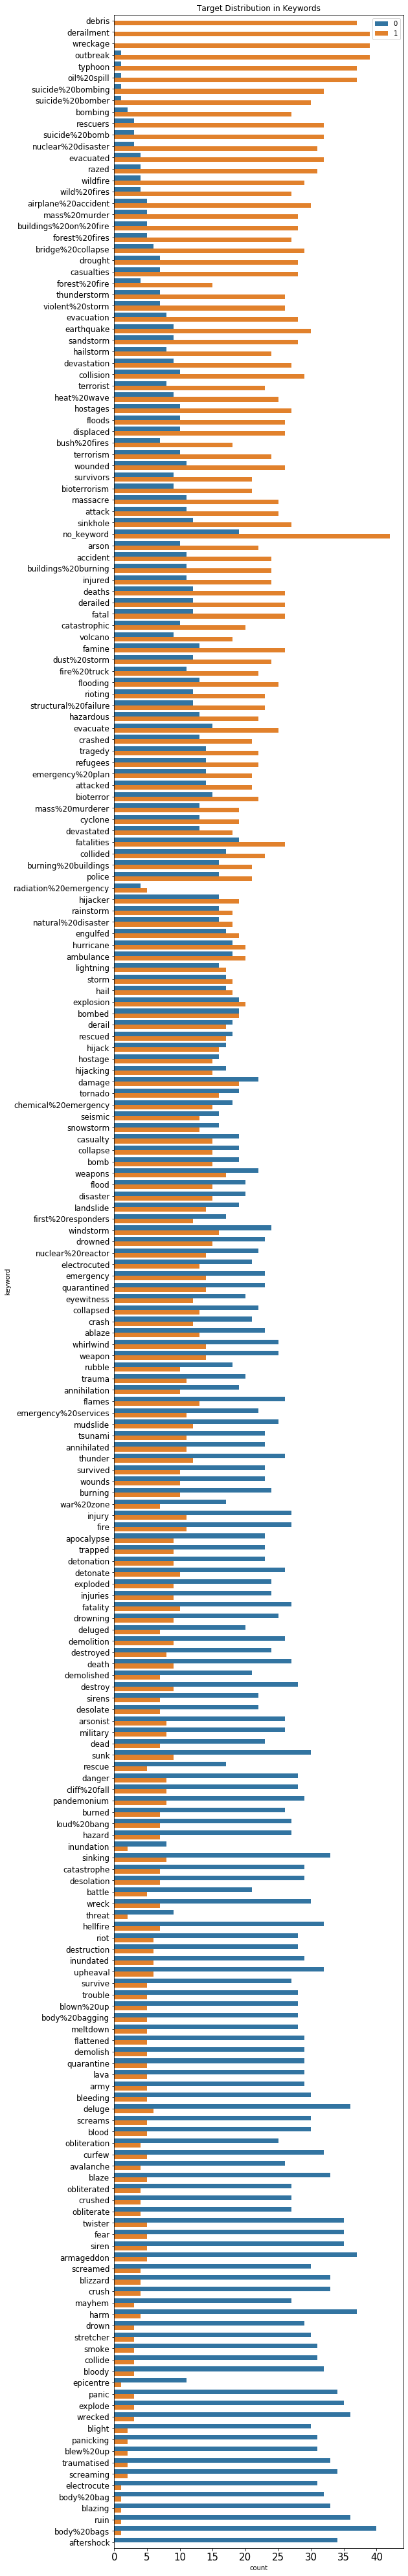

In [7]:
df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize = (8,72))

sns.countplot(y = df_train.sort_values(by = "target_mean", ascending = False)["keyword"],
             hue = df_train.sort_values(by = "target_mean", ascending = False)["target"])

plt.tick_params(axis = "x", labelsize = 15)
plt.tick_params(axis = "y", labelsize = 12)
plt.legend(loc = 1)

plt.title('Target Distribution in Keywords')

plt.show()

df_train.drop(columns = ["target_mean"], inplace = True)

In [8]:
import string
from wordcloud import STOPWORDS

# word_count
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df_train['stop_word_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df_test['stop_word_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
df_train['url_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df_test['url_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test['mean_word_length'] = df_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['text'].apply(lambda x: len(str(x)))

# punctuation_count
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_train['hashtag_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_test['hashtag_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_train['mention_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_test['mention_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

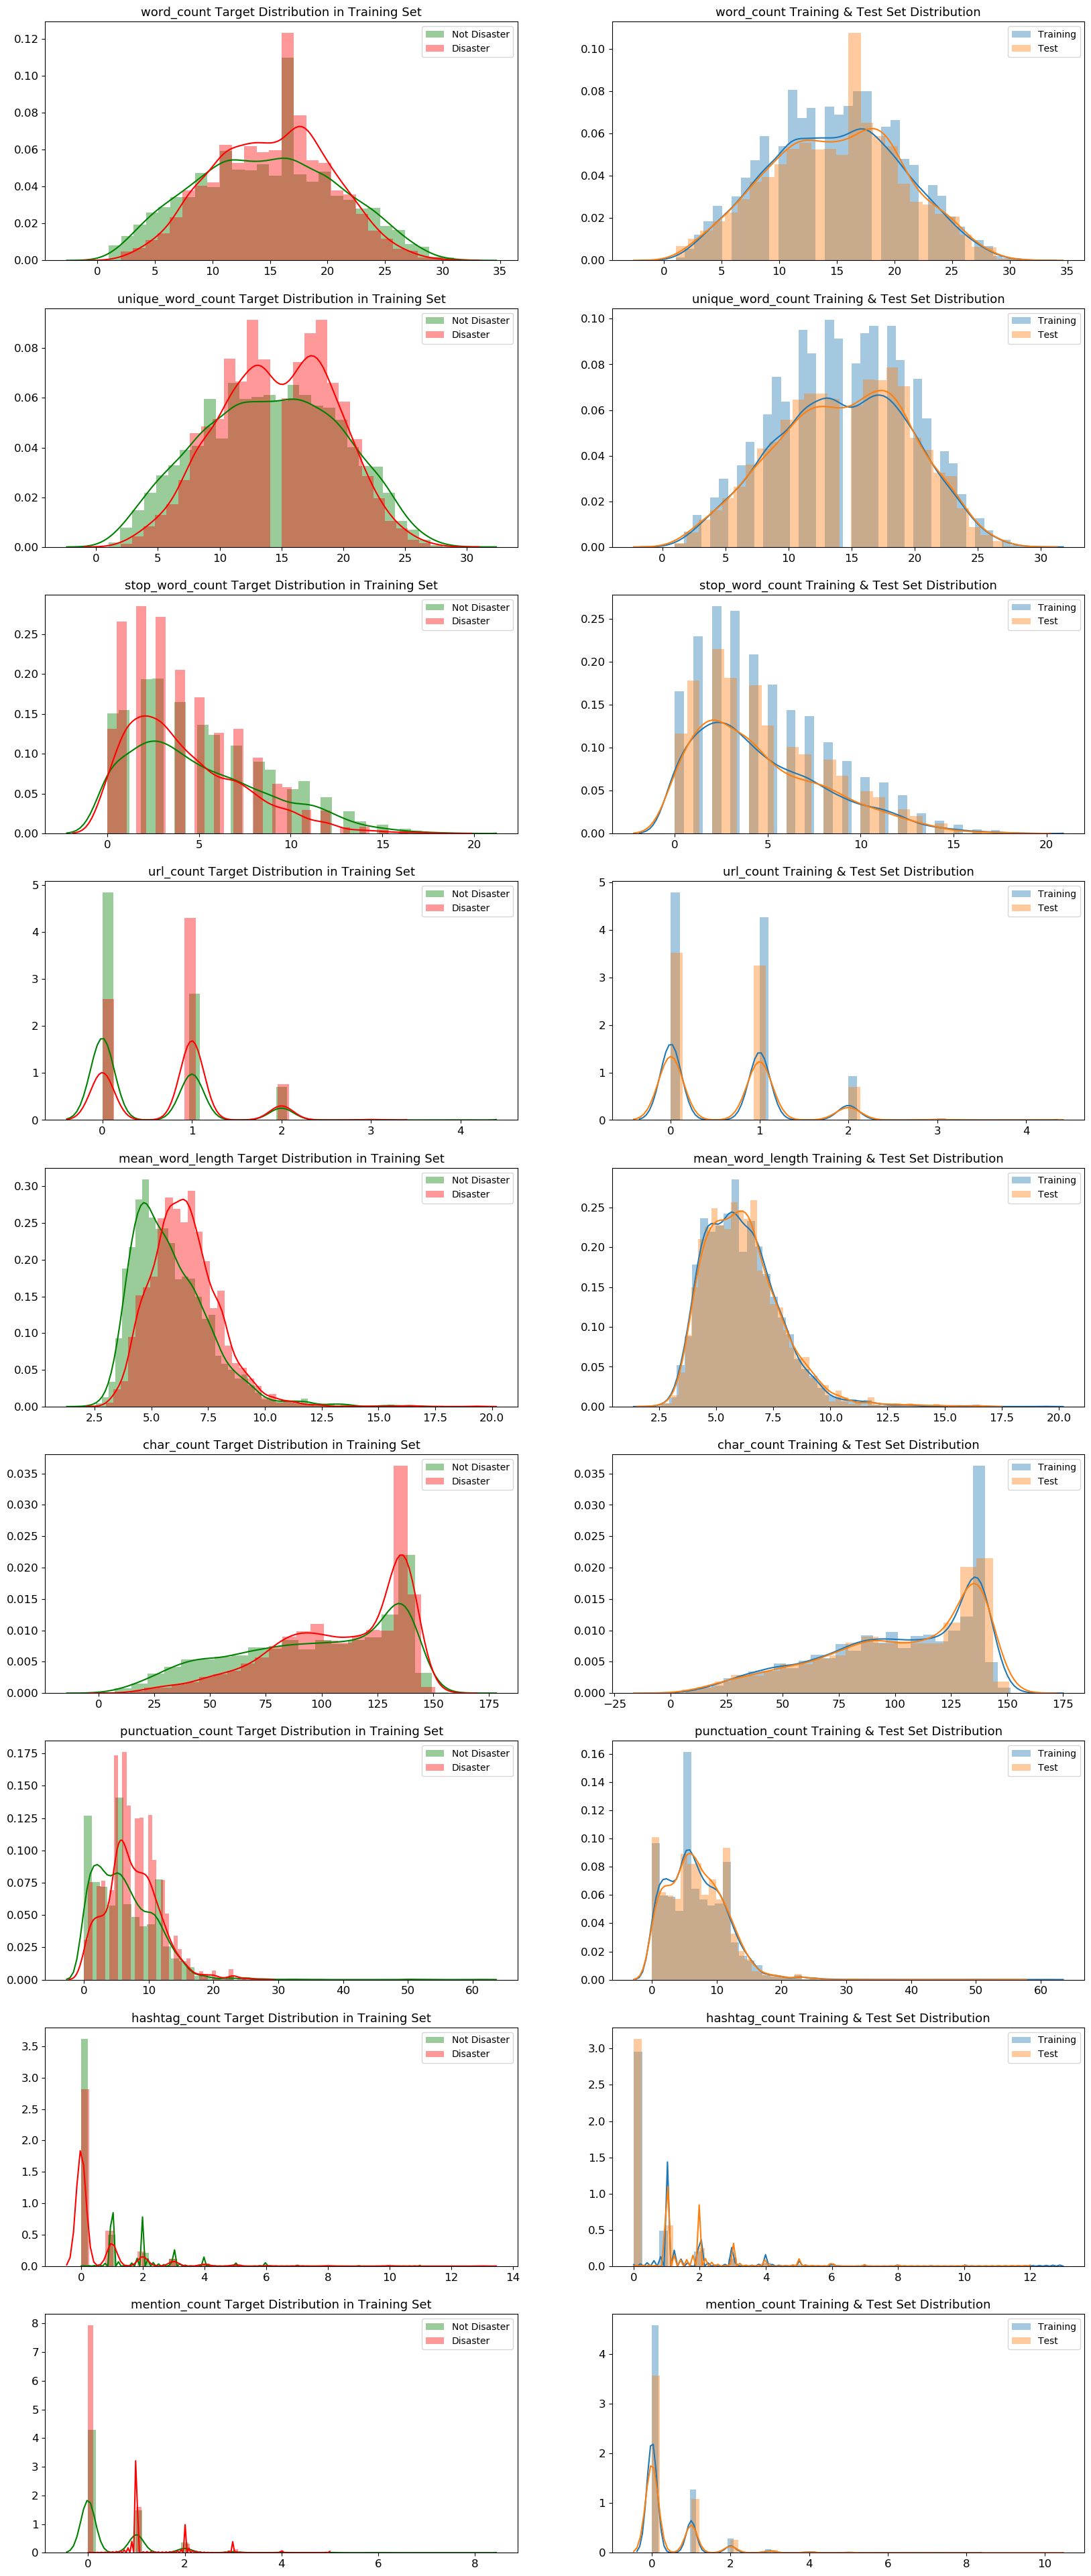

In [9]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
DISASTER_TWEETS = df_train['target'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(df_train.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.distplot(df_train.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')

    sns.distplot(df_train[feature], label='Training', ax=axes[i][1])
    sns.distplot(df_test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()